# EDA and NLP Analysis on News Articles
This notebook focuses on the exploratory data analysis (EDA) of the cleaned news articles and applies natural language processing (NLP) techniques on the **title** and **description** fields to derive meaningful insights.


In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from wordcloud import WordCloud

## Exploratory Data Analysis (EDA)

In this section, we perform EDA on the **training data**. The purpose is to better understand the structure of the dataset and uncover key patterns that will inform our later analysis. Our focus will be on the following fields:
- **Title**: The headline of each article.
- **Description**: A brief summary of the article.
- **Source**: The news outlet or publication that published the article.
- **Published Date**: The date on which the article was published.

In [5]:
# Load the training datasets
with open("dataset/train_harris.json", "r") as file:
    harris_train = json.load(file)

with open("dataset/train_trump.json", "r") as file:
    trump_train = json.load(file)

df_harris_train = pd.DataFrame(harris_train)
df_trump_train = pd.DataFrame(trump_train)

# Basic statistics
print("Number of Harris articles:", len(df_harris_train))
print("Number of Trump articles:", len(df_trump_train))

# Check for missing data in the title and description
print("\nMissing data in Harris articles:")
print(df_harris_train[["title", "description"]].isnull().sum())

print("Missing data in Trump articles:")
print(df_trump_train[["title", "description"]].isnull().sum())

Number of Harris articles: 366
Number of Trump articles: 325

Missing data in Harris articles:
title          0
description    0
dtype: int64
Missing data in Trump articles:
title          0
description    0
dtype: int64


### Distribution of Word Count

We calculate the word count for the **title** and **description** fields in both the **Trump** and **Harris** training datasets. Visualizing the distribution of word counts helps us understand the level of detail and the variability in the length of the articles' titles and descriptions.

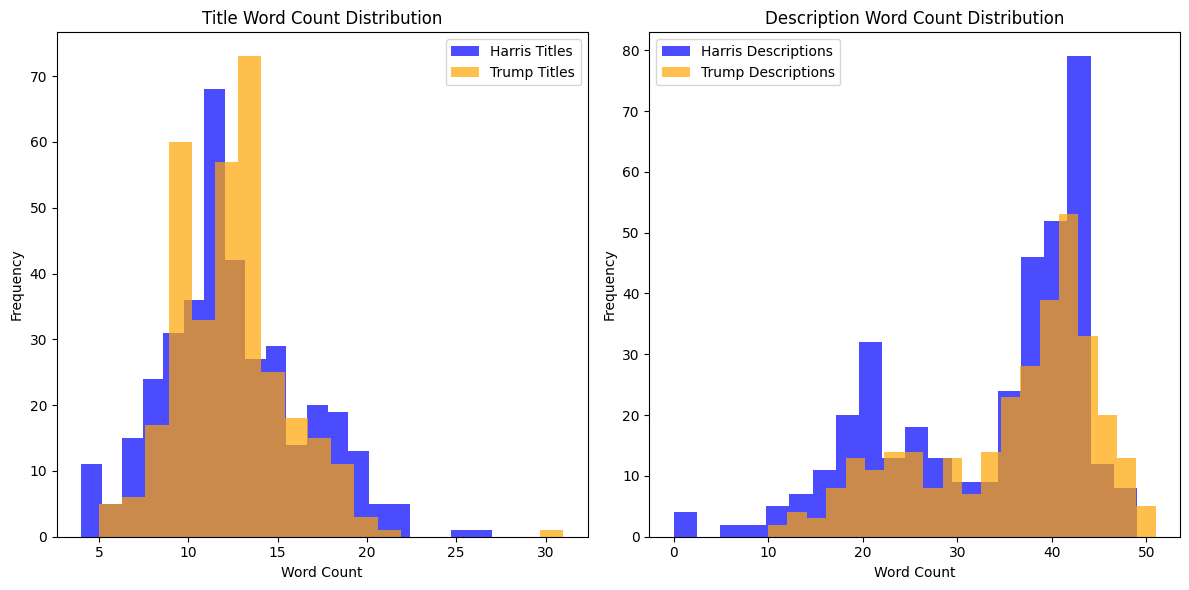

In [6]:
def calculate_word_count(text):
    if pd.notnull(text):
        return len(text.split())
    return 0


# Apply word count function to title and description columns
df_harris_train["title_word_count"] = df_harris_train["title"].apply(calculate_word_count)
df_harris_train["description_word_count"] = df_harris_train["description"].apply(calculate_word_count)

df_trump_train["title_word_count"] = df_trump_train["title"].apply(calculate_word_count)
df_trump_train["description_word_count"] = df_trump_train["description"].apply(calculate_word_count)

plt.figure(figsize=(12, 6))

# Title Word Count
plt.subplot(1, 2, 1)
plt.hist(df_harris_train["title_word_count"], bins=20, alpha=0.7, label="Harris Titles", color="blue")
plt.hist(df_trump_train["title_word_count"], bins=20, alpha=0.7, label="Trump Titles", color="orange")
plt.title("Title Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()

# Description Word Count
plt.subplot(1, 2, 2)
plt.hist(
    df_harris_train["description_word_count"],
    bins=20,
    alpha=0.7,
    label="Harris Descriptions",
    color="blue"
)
plt.hist(
    df_trump_train["description_word_count"],
    bins=20,
    alpha=0.7,
    label="Trump Descriptions",
    color="orange"
)
plt.title("Description Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

### Top News Sources

We analyze the most frequent news sources in both the **Trump** and **Harris** datasets. Understanding which media outlets are publishing the most articles about each candidate gives us insights into potential biases or trends in media coverage.

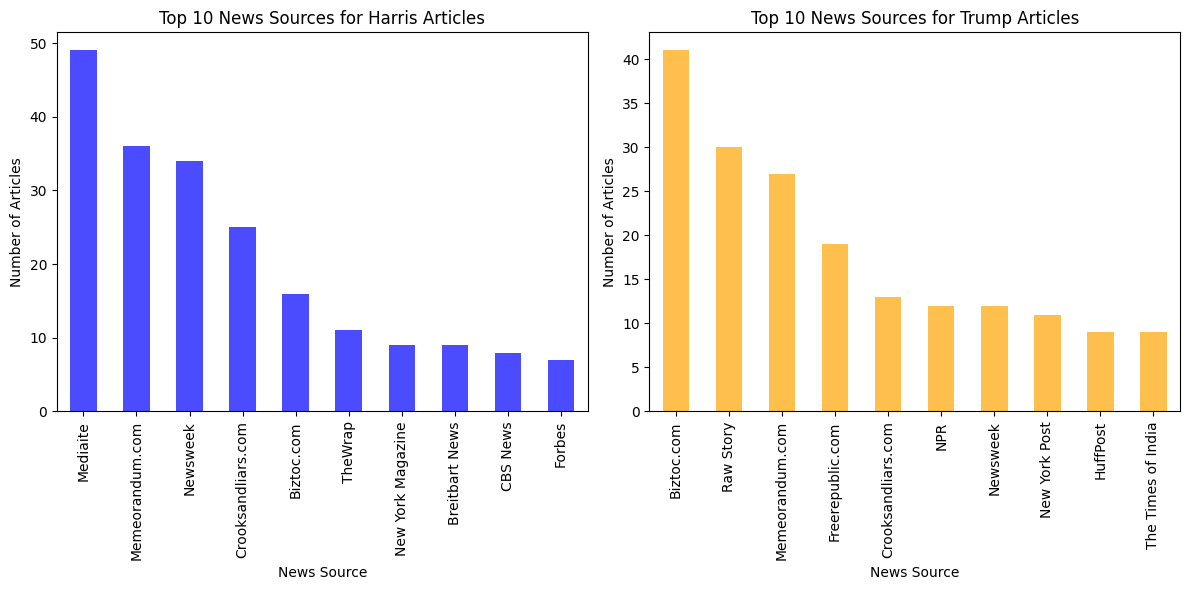

In [7]:
harris_sources = (
    df_harris_train["source"]
    .apply(lambda x: x["name"] if pd.notnull(x) and isinstance(x, dict) else "Unknown")
    .value_counts()
)
trump_sources = (
    df_trump_train["source"]
    .apply(lambda x: x["name"] if pd.notnull(x) and isinstance(x, dict) else "Unknown")
    .value_counts()
)

plt.figure(figsize=(12, 6))

# Harris articles - Top Sources
plt.subplot(1, 2, 1)
harris_sources.head(10).plot(kind="bar", color="blue", alpha=0.7)
plt.title("Top 10 News Sources for Harris Articles")
plt.xlabel("News Source")
plt.ylabel("Number of Articles")
plt.xticks(rotation=90)

# Trump articles - Top Sources
plt.subplot(1, 2, 2)
trump_sources.head(10).plot(kind="bar", color="orange", alpha=0.7)
plt.title("Top 10 News Sources for Trump Articles")
plt.xlabel("News Source")
plt.ylabel("Number of Articles")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Publication Date Analysis

We analyze the publication dates of the articles to explore trends in media coverage over time. By visualizing the number of articles published about each candidate on a timeline, we can identify periods of increased or decreased media attention.

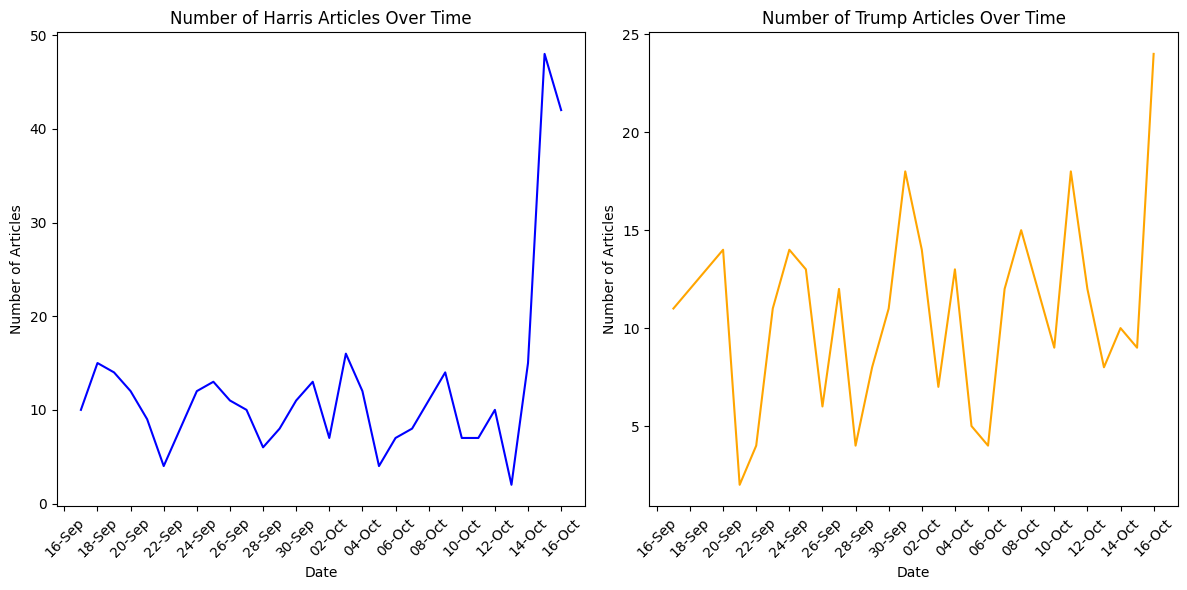

In [8]:
df_harris_train['publishedAt'] = pd.to_datetime(df_harris_train['publishedAt'], errors='coerce')
df_trump_train['publishedAt'] = pd.to_datetime(df_trump_train['publishedAt'], errors='coerce')

plt.figure(figsize=(12, 6))

# Harris articles over time
plt.subplot(1, 2, 1)
df_harris_train.groupby(df_harris_train["publishedAt"].dt.date).size().plot(
    kind="line", color="blue"
)
plt.title("Number of Harris Articles Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Show every 2nd day
plt.gca().xaxis.set_major_formatter(
    mdates.DateFormatter("%d-%b")
)

# Trump articles over time
plt.subplot(1, 2, 2)
df_trump_train.groupby(df_trump_train["publishedAt"].dt.date).size().plot(
    kind="line", color="orange"
)
plt.title("Number of Trump Articles Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Show every 2nd day
plt.gca().xaxis.set_major_formatter(
    mdates.DateFormatter("%d-%b")
)
plt.tight_layout()
plt.show()

### Word Cloud of Common Words

We create word clouds based on the most frequently used words in the **title** and **description** fields combined for both the **Trump** and **Harris** articles. This gives us a visual representation of the common terms and themes in the articles related to each candidate.

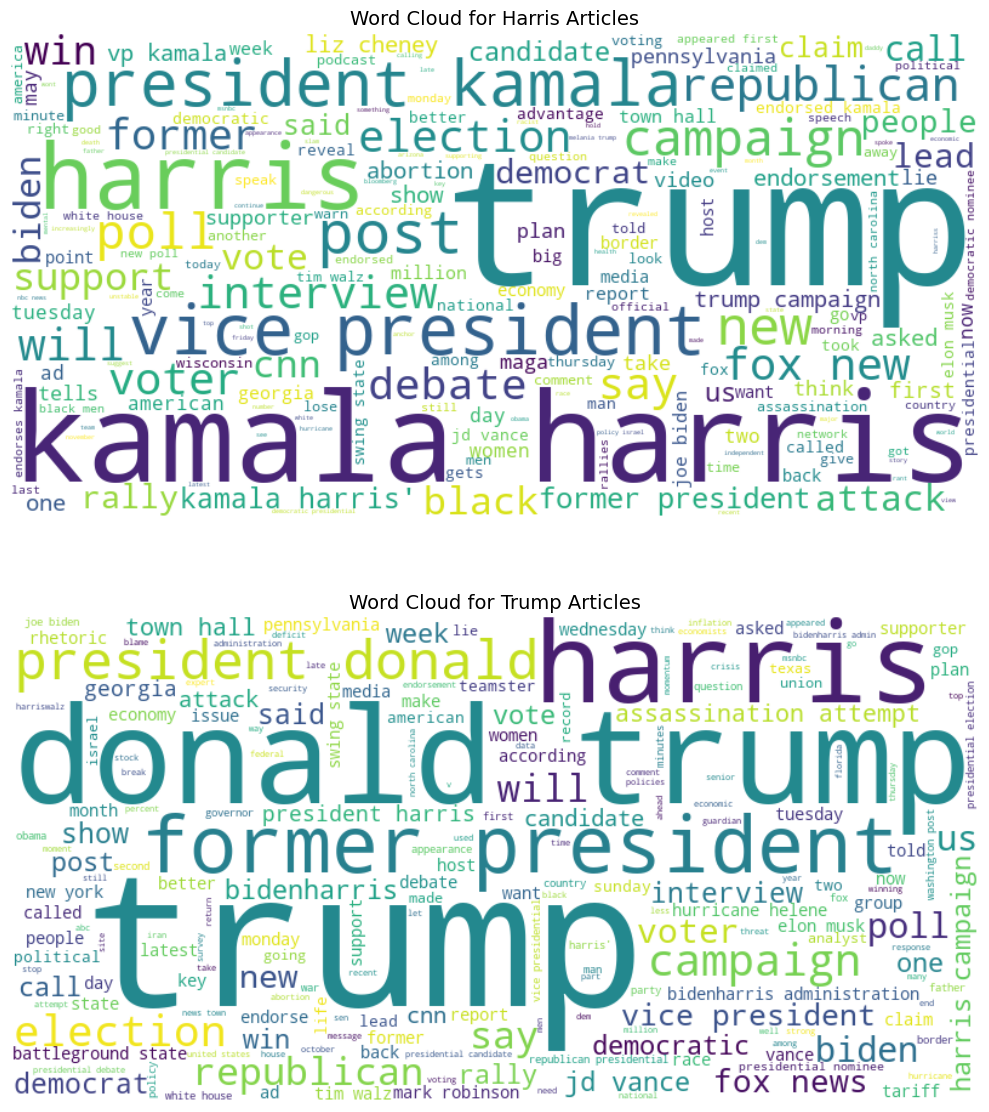

In [9]:
# Function to combine title and description text
def combine_text(dataframe):
    return " ".join(
        dataframe["title"].fillna("") + " " + dataframe["description"].fillna("")
    )


harris_combined_text = combine_text(df_harris_train)
harris_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    harris_combined_text
)

trump_combined_text = combine_text(df_trump_train)
trump_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    trump_combined_text
)

plt.figure(figsize=(10, 12))

# Harris word cloud
plt.subplot(2, 1, 1)
plt.imshow(harris_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Harris Articles", fontsize=14)

# Trump word cloud
plt.subplot(2, 1, 2)
plt.imshow(trump_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Trump Articles", fontsize=14)
plt.tight_layout()
plt.show()

Fake News detection

In [34]:
import pandas as pd

def read_dataframe(tsv_file: str) -> pd.DataFrame:

    df = pd.read_csv(tsv_file, delimiter='\t', dtype=object)
    
    df.fillna("", inplace=True)
    
    df.columns = [
        'id',
        'label',
        'statement',
        'subjects',
        'speaker',
        'title',
        'state',
        'party',
        '1',
        '2',
        '3',
        '4',
        '5',
        
        'context'
    ]
    
    df = df[['id', 'label', 'statement', 'subjects']]
    
    return df

fake_news_df = read_dataframe('dataset/train.tsv')

print(fake_news_df.head())

print("Total number of articles:", len(fake_news_df))
fake_news_df = fake_news_df.dropna(subset=['statement', 'label'])
fake_news_df['label'] = fake_news_df['label'].map({'false': 0, 'true': 1, 'mostly-true': 1, 'mostly-false': 0})
fake_news_df = fake_news_df.dropna(subset=['statement', 'label'])

           id        label                                          statement  \
0  10540.json    half-true  When did the decline of coal start? It started...   
1    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
2   1123.json        false  Health care reform legislation is likely to ma...   
3   9028.json    half-true  The economic turnaround started at the end of ...   
4  12465.json         true  The Chicago Bears have had more starting quart...   

                             subjects  
0  energy,history,job-accomplishments  
1                      foreign-policy  
2                         health-care  
3                        economy,jobs  
4                           education  
Total number of articles: 10239


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

fake_news_df = fake_news_df[fake_news_df['statement'] != ""]

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_fake_news = tfidf.fit_transform(fake_news_df['statement'])
y_fake_news = fake_news_df['label']

X_train, X_test, y_train, y_test = train_test_split(X_fake_news, y_fake_news, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

trump_vectors = tfidf.transform(df_trump_train['title'])
harris_vectors = tfidf.transform(df_harris_train['title'])

trump_predictions = model.predict(trump_vectors)
harris_predictions = model.predict(harris_vectors)


df_trump_train['fake_news_prediction'] = ['fake' if pred == 0 else 'real' for pred in trump_predictions]
df_harris_train['fake_news_prediction'] = ['fake' if pred == 0 else 'real' for pred in harris_predictions]

trump_fake_percentage = (df_trump_train['fake_news_prediction'].value_counts(normalize=True) * 100).get('fake', 0)
harris_fake_percentage = (df_harris_train['fake_news_prediction'].value_counts(normalize=True) * 100).get('fake', 0)


# Filter articles classified as fake
fake_trump_articles = df_trump_train[df_trump_train['fake_news_prediction'] == 'fake']
fake_harris_articles = df_harris_train[df_harris_train['fake_news_prediction'] == 'fake']

# Display the fake articles
print("\nFake Articles for Trump:")
print(fake_trump_articles[['title', 'fake_news_prediction']])

print("\nFake Articles for Harris:")
print(fake_harris_articles[['title', 'fake_news_prediction']])



summary_df = pd.DataFrame({
    'Candidate': ['Trump', 'Harris'],
    'Fake Percentage': [trump_fake_percentage, harris_fake_percentage]
})

print("\nFormatted Summary:")
for index, row in summary_df.iterrows():
    print(f"{row['Candidate']} articles classified as fake: {row['Fake Percentage']:.2f}%")

Training data shape: (4505, 5000)
Testing data shape: (1127, 5000)
Accuracy: 0.637089618456078
              precision    recall  f1-score   support

         0.0       0.52      0.14      0.22       413
         1.0       0.65      0.92      0.76       714

    accuracy                           0.64      1127
   macro avg       0.58      0.53      0.49      1127
weighted avg       0.60      0.64      0.56      1127


Fake Articles for Trump:
                                                 title fake_news_prediction
25   harris calls republicans hypocrites in powerfu...                 fake
68   harris sticks with biden on foreign policy for...                 fake
98       bidenharris admins medicare shock for seniors                 fake
109  tim walz rebuffs fox news host over minnesota ...                 fake
128  extinguish him for good bidenharris cabinet se...                 fake
193  trump walks away muttering take a look when as...                 fake
321  sounds like jd 

## Sentiment Analysis - Setup

In this section, we begin by setting up the necessary tools for sentiment analysis using the **NLTK** library. We download relevant resources such as the **VADER lexicon**, **stopwords**, and tools for **tokenization** and **lemmatization**. 

We also load the **training** and **test** datasets for both **Trump** and **Harris** articles. The training data will be used to build our sentiment model, while the test data will be used for evaluation.

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("vader_lexicon")
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


def load_articles(train_or_test="train"):
    with open(f"dataset/{train_or_test}_harris.json", "r") as harris_file:
        harris_articles = json.load(harris_file)
    with open(f"dataset/{train_or_test}_trump.json", "r") as trump_file:
        trump_articles = json.load(trump_file)
    return harris_articles, trump_articles


# Load training data
harris_train_articles, trump_train_articles = load_articles("train")

# Load testing data
harris_test_articles, trump_test_articles = load_articles("test")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jaco/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/jaco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jaco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jaco/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jaco/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Sentiment Analysis - Processing Articles

In this step, we preprocess the text by removing common names (e.g., **Trump**, **Harris**) and applying **lemmatization** and **stopword removal** to clean the text. We then use the **VADER SentimentIntensityAnalyzer** to calculate sentiment scores for both the **title** and **description** fields of each article. The sentiment score is aggregated across sentences to produce a compound sentiment score for each article.

In [9]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("punkt")

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


def preprocess(text):
    text = text.lower()

    # Remove candidate names (more concise and generalized)
    text = re.sub(r"\b(kamala|kamala's|harris|donald|j|trump|trump's)\b", "", text)

    # Tokenize and lemmatize words
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha()]

    # Remove stopwords and specific unwanted words (like "ha" and "wa")
    unwanted_words = {"ha", "wa"}
    words = [word for word in words if word not in stop_words and word not in unwanted_words]

    return " ".join(words)


# Total sentiment score for an article (combined title + description)
def calculate_sentiment_for_article(article):
    sentences = sent_tokenize(article)
    total_score = 0

    for sentence in sentences:
        sentiment = sid.polarity_scores(sentence)
        total_score += sentiment["compound"]

    return total_score


def process_articles(articles, candidate_name):
    candidate_data = []

    for article in articles:
        title = article.get("title", "")
        description = article.get("description", "")
        published_at = article.get("publishedAt", "")

        if title or description:
            cleaned_title = preprocess(title)
            cleaned_description = preprocess(description)

            combined_text = cleaned_title + " " + cleaned_description

            total_score = calculate_sentiment_for_article(combined_text)

            candidate_data.append(
                {
                    "article": combined_text,
                    "candidate": candidate_name,
                    "score": total_score,
                    "publishedAt": published_at,
                }
            )

    return candidate_data


harris_data = process_articles(harris_train_articles, "Kamala Harris")
trump_data = process_articles(trump_train_articles, "Donald Trump")

df_harris_train = pd.DataFrame(harris_data)
df_trump_train = pd.DataFrame(trump_data)

# Save to CSV for analysis
df_harris_train.to_csv("dataset/train_harris_sentiment.csv", index=False)
df_trump_train.to_csv("dataset/train_trump_sentiment.csv", index=False)

[nltk_data] Downloading package punkt to /home/jaco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Sentiment Distribution

To account for the unequal number of articles between Kamala Harris and Donald Trump, we converted the sentiment distribution from raw counts to percentages. This ensures a fair comparison, as the sentiment distribution for each candidate is now based on the proportion of articles. For each candidate, the percentages of **positive**, **negative**, and **neutral** articles are plotted, allowing us to focus on the sentiment trends rather than the total number of articles.

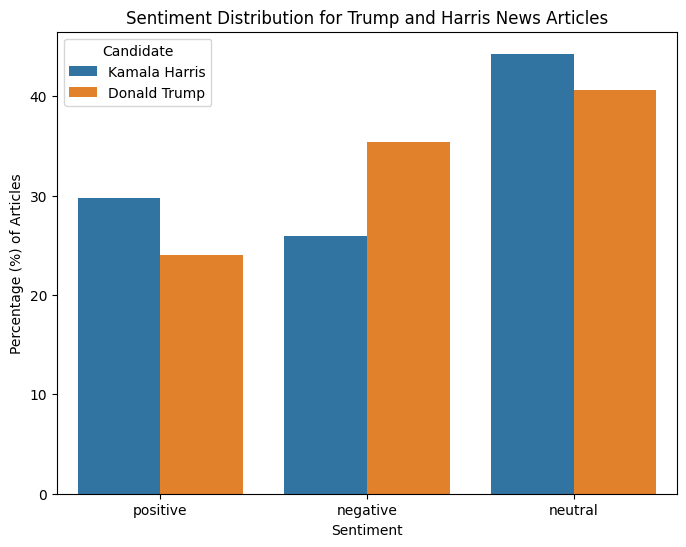

In [10]:
def calculate_sentiment_distribution(articles):
    sentiments = {"positive": 0, "negative": 0, "neutral": 0}

    for article in articles:
        compound_score = sid.polarity_scores(article.get("article"))["compound"]

        if compound_score > 0.5:
            sentiments["positive"] += 1
        elif compound_score < -0.5:
            sentiments["negative"] += 1
        else:
            sentiments["neutral"] += 1

    return sentiments


harris_sentiment_distribution = calculate_sentiment_distribution(harris_data)
trump_sentiment_distribution = calculate_sentiment_distribution(trump_data)

# Convert counts to percentages
harris_total = sum(harris_sentiment_distribution.values())
trump_total = sum(trump_sentiment_distribution.values())

harris_percentages = {
    key: (value / harris_total) * 100
    for key, value in harris_sentiment_distribution.items()
}
trump_percentages = {
    key: (value / trump_total) * 100
    for key, value in trump_sentiment_distribution.items()
}

sentiment_labels = ["positive", "negative", "neutral"]
harris_counts = [harris_percentages[sentiment] for sentiment in sentiment_labels]
trump_counts = [trump_percentages[sentiment] for sentiment in sentiment_labels]

df_sentiment = pd.DataFrame(
    {
        "Sentiment": sentiment_labels * 2,
        "Percentage": harris_counts + trump_counts,
        "Candidate": ["Kamala Harris"] * 3 + ["Donald Trump"] * 3,
    }
)

plt.figure(figsize=(8, 6))
sns.barplot(x="Sentiment", y="Percentage", hue="Candidate", data=df_sentiment)
plt.title("Sentiment Distribution for Trump and Harris News Articles")
plt.ylabel("Percentage (%) of Articles")
plt.show()

### Sentiment Score Distribution

This plot shows the sentiment score distribution for both Donald Trump and Kamala Harris, converted into percentages to account for the different number of articles for each candidate. The blue line represents Trump's sentiment, while the red line represents Kamala's sentiment. This visualization helps us understand the overall sentiment tendencies of the articles for each candidate as a proportion of their total articles.

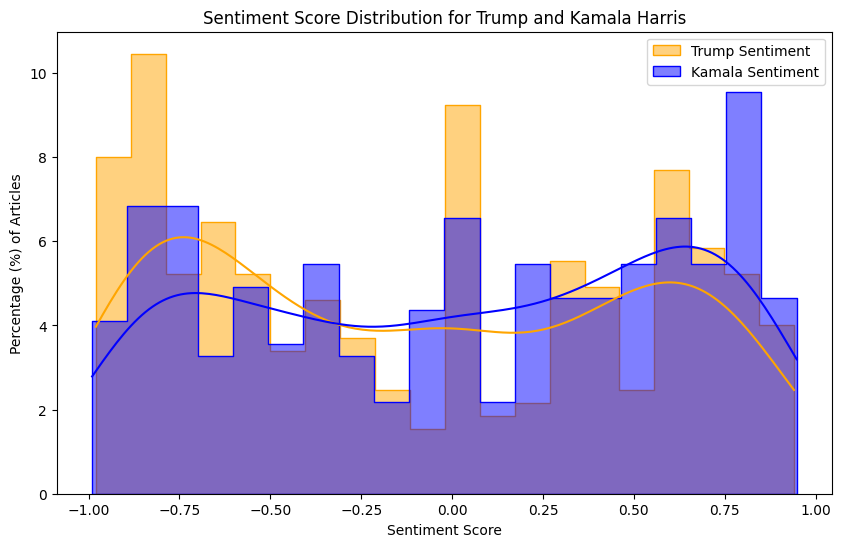

In [11]:
df_trump = pd.DataFrame(trump_data)
df_harris = pd.DataFrame(harris_data)

trump_total = len(df_trump)
harris_total = len(df_harris)

plt.figure(figsize=(10, 6))
sns.histplot(
    df_trump["score"],
    color="orange",
    label="Trump Sentiment",
    kde=True,
    bins=20,
    stat="percent",
    element="step",
)
sns.histplot(
    df_harris["score"],
    color="blue",
    label="Kamala Sentiment",
    kde=True,
    bins=20,
    stat="percent",
    element="step",
)
plt.title("Sentiment Score Distribution for Trump and Kamala Harris")
plt.xlabel("Sentiment Score")
plt.ylabel("Percentage (%) of Articles")
plt.legend()
plt.show()

### Combined Sentiment Score (Trump - Kamala)

This plot shows the distribution of the combined sentiment scores, calculated as the difference between the sentiment scores of Trump and Kamala articles. A positive score indicates a more favorable sentiment towards Trump, while a negative score indicates a more favorable sentiment towards Kamala Harris. The y-axis reflects the percentage of articles to allow for a fair comparison.

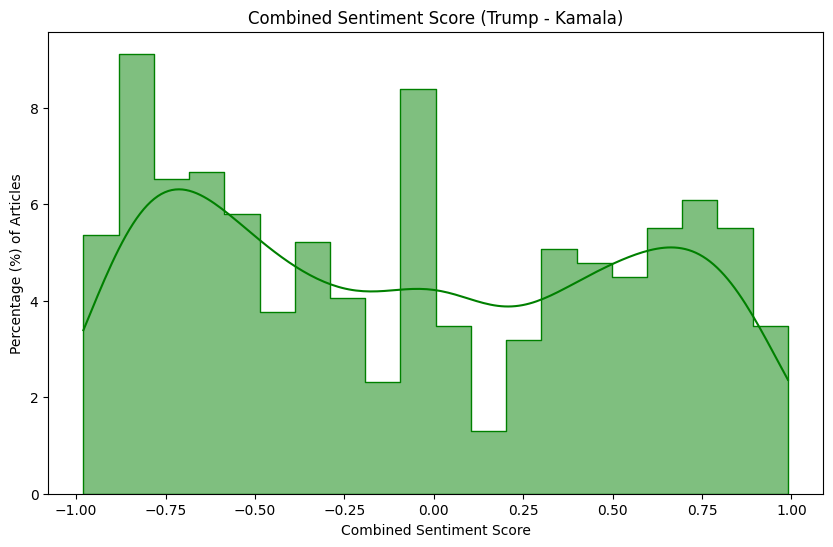

In [12]:
df_trump["combined_score"] = df_trump["score"]
df_harris["combined_score"] = -df_harris["score"]

df_combined = pd.concat([df_trump, df_harris], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.histplot(
    df_combined["combined_score"],
    color="green",
    kde=True,
    bins=20,
    stat="percent",
    element="step",
)
plt.title("Combined Sentiment Score (Trump - Kamala)")
plt.xlabel("Combined Sentiment Score")
plt.ylabel("Percentage (%) of Articles")
plt.show()

### Word Clouds (after processing the articles)

These word clouds visualize the most frequently occurring words in the articles related to each candidate, after we have processed the articles. The larger the word, the more often it appears in the text. This provides a quick insight into the common themes and language used in the articles.

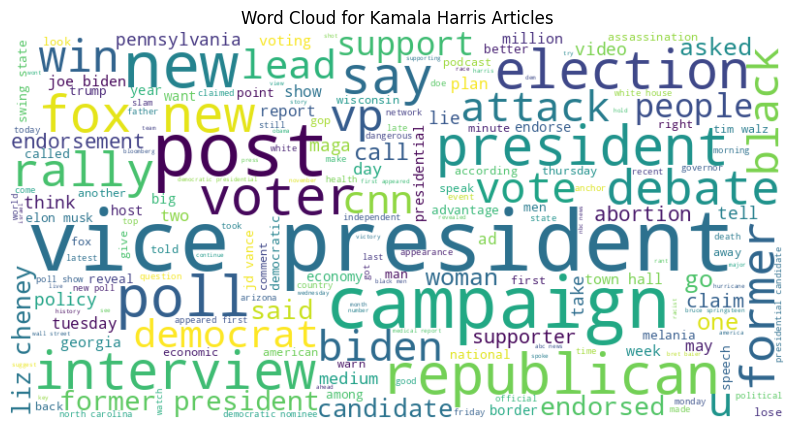

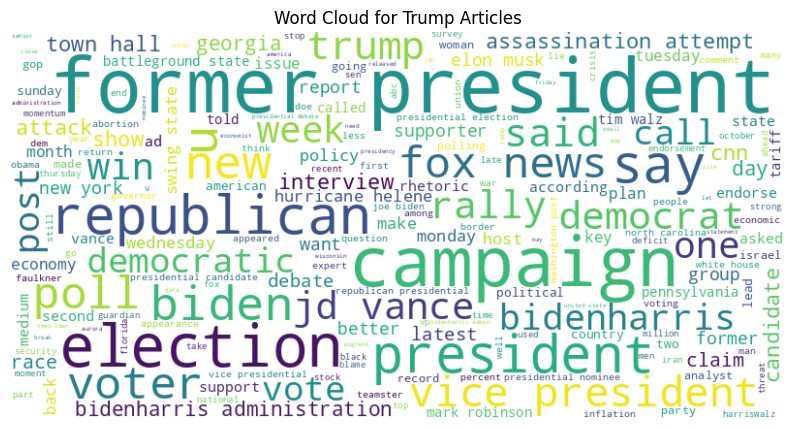

In [13]:
from wordcloud import WordCloud


def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
        text
    )
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


kamala_articles_text = " ".join(df_harris["article"])
plot_wordcloud(kamala_articles_text, "Word Cloud for Kamala Harris Articles")

trump_articles_text = " ".join(df_trump["article"])
plot_wordcloud(trump_articles_text, "Word Cloud for Trump Articles")

### Top Words Analysis

In this step, we extract the **top 10 most common words** and **words with counts greater than 10** from the preprocessed article text for both **Kamala Harris** and **Donald Trump** articles. This helps us identify the most frequently mentioned terms in each dataset and understand common themes or terms.

We use the `Counter` from the `collections` module to count the frequency of words in each article, and then extract the top 10 words and words with counts greater than 10.

In [14]:
from collections import Counter

def get_top_words_and_words_above_10(candidate_data):
    all_words = []
    
    # Collect all words from the articles
    for item in candidate_data:
        words = item['article'].split()
        all_words.extend(words)
    
    word_counts = Counter(all_words)
    
    top_10_words = [word for word, _ in word_counts.most_common(10)]

    words_above_10 = [word for word, count in word_counts.items() if count > 10]
    
    return top_10_words, words_above_10

harris_top_10, harris_words_above_10 = get_top_words_and_words_above_10(harris_data)
trump_top_10, trump_words_above_10 = get_top_words_and_words_above_10(trump_data)

print("Top 10 words in Harris articles:\n", harris_top_10)
print("\nWords in Harris articles with counts > 10:\n", harris_words_above_10)
print("\nTop 10 words in Trump articles:\n", trump_top_10)
print("\nWords in Trump articles with counts > 10:\n", trump_words_above_10)

Top 10 words in Harris articles:
 ['president', 'vice', 'post', 'news', 'campaign', 'poll', 'republican', 'former', 'voter', 'fox']

Words in Harris articles with counts > 10:
 ['fox', 'news', 'former', 'president', 'vice', 'interview', 'democratic', 'presidential', 'vote', 'advantage', 'economy', 'among', 'men', 'say', 'abc', 'debate', 'called', 'lie', 'million', 'another', 'claim', 'could', 'election', 'lead', 'year', 'may', 'baier', 'supporter', 'post', 'one', 'u', 'go', 'joe', 'podcast', 'attack', 'health', 'get', 'minute', 'cnn', 'republican', 'voter', 'thursday', 'biden', 'support', 'protrump', 'plan', 'win', 'would', 'economic', 'policy', 'look', 'border', 'first', 'since', 'nominee', 'white', 'house', 'political', 'report', 'campaign', 'pennsylvania', 'also', 'big', 'day', 'poll', 'according', 'new', 'tuesday', 'full', 'black', 'rally', 'people', 'asked', 'medical', 'record', 'right', 'week', 'vp', 'video', 'show', 'back', 'cheney', 'endorsed', 'tell', 'think', 'time', 'woman',

### Sentiment Score Over Time

The following plots show the average sentiment score for Trump and Kamala Harris articles over time, using a 5-day rolling mean.

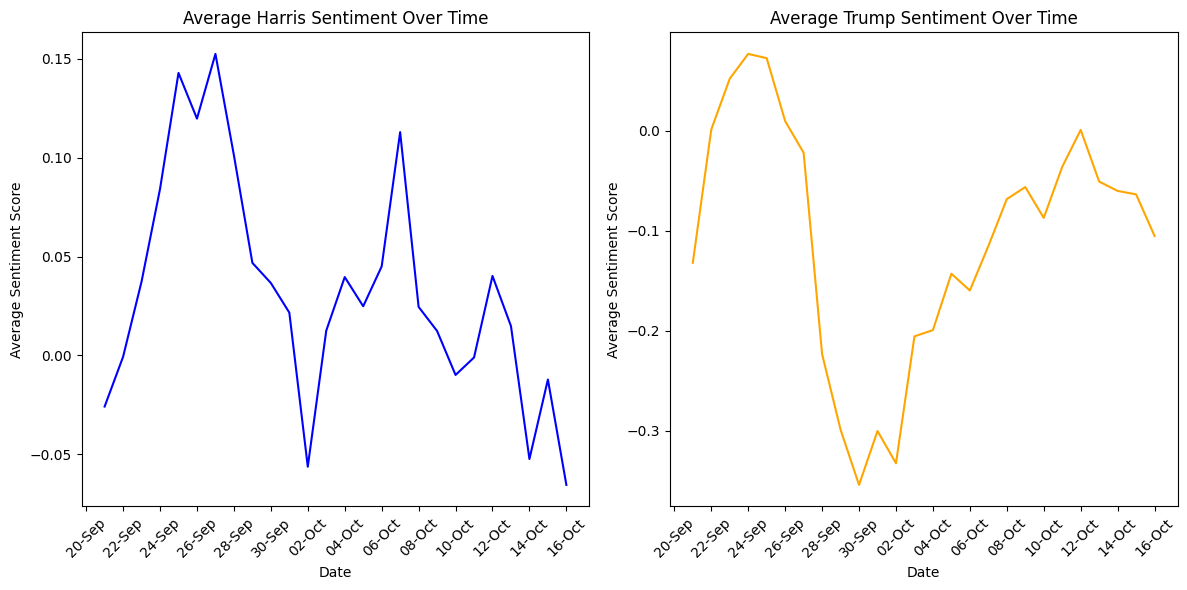

In [15]:
df_trump["date"] = pd.to_datetime(df_trump["publishedAt"], errors="coerce")
df_harris["date"] = pd.to_datetime(df_harris["publishedAt"], errors="coerce")

df_trump_daily = df_trump.groupby(df_trump["date"].dt.date)["score"].mean()
df_trump_rolling = df_trump_daily.rolling(window=5).mean()

df_harris_daily = df_harris.groupby(df_harris["date"].dt.date)["score"].mean()
df_harris_rolling = df_harris_daily.rolling(window=5).mean()

plt.figure(figsize=(12, 6))

# Plot Harris sentiment over time
plt.subplot(1, 2, 1)
df_harris_rolling.plot(color="blue", label="Kamala Harris Sentiment")
plt.title("Average Harris Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))

# Plot Trump sentiment over time
plt.subplot(1, 2, 2)
df_trump_rolling.plot(color="orange", label="Trump Sentiment")
plt.title("Average Trump Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
plt.tight_layout()
plt.show()

### Manual Sentiment Rating for Test Data

Since the test dataset does not come with predefined sentiment scores, each article in the test set was manually reviewed and assigned a sentiment score. This manual process is necessary because our deep learning model (BERT) requires labeled test data for evaluation. However, we acknowledge that this introduces the potential for human bias, and we'll need to ensure consistency in the scoring.

The following function processes the test articles by combining their **title** and **description** and using the manually assigned sentiment score.

In [16]:
def process_test_articles(articles, candidate_name):
    candidate_data = []

    for article in articles:
        title = article.get("title", "")
        description = article.get("description", "")
        score = article.get("score", 0)  # Use the score directly from the test data

        if title or description:
            cleaned_title = preprocess(title)
            cleaned_description = preprocess(description)

            candidate_data.append(
                {
                    "article": cleaned_title + " " + cleaned_description,
                    "candidate": candidate_name,
                    "score": score,
                    "publishedAt": article.get("publishedAt", ""),
                }
            )

    return candidate_data


harris_test_data = process_test_articles(harris_test_articles, "Kamala Harris")
trump_test_data = process_test_articles(trump_test_articles, "Donald Trump")

df_test_harris = pd.DataFrame(harris_test_data)
df_test_harris.to_csv("dataset/test_harris_sentiment.csv", index=False)

df_test_trump = pd.DataFrame(trump_test_data)
df_test_trump.to_csv("dataset/test_trump_sentiment.csv", index=False)

print(df_test_harris.head())
print(df_test_trump.head())

                                             article      candidate   score  \
0  get good news swing state poll show wisconsin ...  Kamala Harris  0.7049   
1  campaign plan ramp negative messaging nbc news...  Kamala Harris  0.0000   
2  rufus wainwright say playing hallelujah cover ...  Kamala Harris  0.2215   
3  wingnut social medium dickhead tim pool sue li...  Kamala Harris -0.0897   
4  gutfeld mock word salad clip actually easily d...  Kamala Harris  0.1045   

            publishedAt  
0  2024-09-23T21:15:04Z  
1  2024-10-04T22:25:04Z  
2  2024-10-15T17:02:18Z  
3  2024-09-19T12:55:02Z  
4  2024-09-19T19:31:30Z  
                                             article     candidate   score  \
0  speech economy policy watch former president h...  Donald Trump -0.2951   
1  texas jury clear train driver civil trial bide...  Donald Trump  0.0000   
2  excardinals kicker jay feely endorses better j...  Donald Trump  0.5215   
3  warnock wont significant number black men voti...  Don

### Sentiment Analysis on Test Data

For the test set, we are running the same sentiment analysis used for the training data. This ensures consistency in processing and scoring, allowing us to compare these results with manually assigned scores.

By comparing the sentiment scores generated from the automatic analysis with the manually assigned scores, we can evaluate the accuracy and performance of our sentiment analysis model.

The comparison will help us determine how well the model is able to capture the sentiment of the articles.

In [17]:
harris_auto_test_data = process_articles(harris_test_articles, "Kamala Harris")
trump_auto_test_data = process_articles(trump_test_articles, "Donald Trump")

df_harris_auto_test = pd.DataFrame(harris_auto_test_data)
df_trump_auto_test = pd.DataFrame(trump_auto_test_data)

# Join the manually labeled scores with the automatically generated scores
df_harris_comparison = pd.merge(
    df_harris_auto_test,
    pd.DataFrame(harris_test_data),
    on="article",
    suffixes=("_auto", "_manual"),
)
df_trump_comparison = pd.merge(
    df_trump_auto_test,
    pd.DataFrame(trump_test_data),
    on="article",
    suffixes=("_auto", "_manual"),
)

print(df_harris_comparison[["article", "score_auto", "score_manual"]].head())
print(df_trump_comparison[["article", "score_auto", "score_manual"]].head())

                                             article  score_auto  score_manual
0  get good news swing state poll show wisconsin ...      0.4404        0.7049
1  campaign plan ramp negative messaging nbc news...     -0.7650        0.0000
2  rufus wainwright say playing hallelujah cover ...      0.8225        0.2215
3  wingnut social medium dickhead tim pool sue li...      0.0772       -0.0897
4  gutfeld mock word salad clip actually easily d...     -0.4767        0.1045
                                             article  score_auto  score_manual
0  speech economy policy watch former president h...      0.4404       -0.2951
1  texas jury clear train driver civil trial bide...     -0.2263        0.0000
2  excardinals kicker jay feely endorses better j...      0.9371        0.5215
3  warnock wont significant number black men voti...     -0.3875       -0.2897
4  rhetoric roulette real human financial time co...     -0.0772       -0.3955


### Evaluating Sentiment Analysis Performance

Now that we have both the automatically generated and manually assigned sentiment scores, the next step is to evaluate how well the automatic sentiment analysis performed. We will calculate key performance metrics such as:

- **Mean Absolute Error (MAE)**: To assess the average difference between the automatic and manual sentiment scores.
- **Correlation Coefficient**: To measure the linear relationship between the two sets of scores.
- **Mean Squared Error**: To assess the average difference, squared.

These metrics will help us understand the accuracy and reliability of the automatic sentiment analysis.

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

harris_mae = mean_absolute_error(
    df_harris_comparison["score_manual"], df_harris_comparison["score_auto"]
)
trump_mae = mean_absolute_error(
    df_trump_comparison["score_manual"], df_trump_comparison["score_auto"]
)

harris_corr = np.corrcoef(
    df_harris_comparison["score_manual"], df_harris_comparison["score_auto"]
)[0, 1]
trump_corr = np.corrcoef(
    df_trump_comparison["score_manual"], df_trump_comparison["score_auto"]
)[0, 1]

harris_mse = mean_squared_error(
    df_harris_comparison["score_manual"], df_harris_comparison["score_auto"]
)
trump_mse = mean_squared_error(
    df_trump_comparison["score_manual"], df_trump_comparison["score_auto"]
)

print(f"MAE for Harris: {harris_mae}")
print(f"MAE for Trump: {trump_mae}")
print(f"Correlation for Harris: {harris_corr}")
print(f"Correlation for Trump: {trump_corr}")
print(f"MSE for Harris: {harris_mse}")
print(f"MSE for Trump: {trump_mse}")

MAE for Harris: 0.5517097560975611
MAE for Trump: 0.46451081081081086
Correlation for Harris: 0.22895376576819484
Correlation for Trump: 0.37610447524073287
MSE for Harris: 0.4212617812195122
MSE for Trump: 0.2857314824324325


## Topic Modeling Using Latent Dirichlet Allocation (LDA)

For this part of the analysis, we use the **Latent Dirichlet Allocation (LDA)** algorithm to discover hidden topics in the **cleaned article text** for Kamala Harris and Donald Trump. Topic modeling allows us to identify common themes across the articles. We use the cleaned text data to build a term-document matrix, then apply LDA to extract key topics for both candidates.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

df_harris_train = pd.read_csv("dataset/train_harris_sentiment.csv")
df_trump_train = pd.read_csv("dataset/train_trump_sentiment.csv")

# Convert data to list of dictionaries
harris_data = df_harris_train.to_dict(orient="records")
trump_data = df_trump_train.to_dict(orient="records")


# Perform topic modeling using LDA
def perform_topic_modeling(articles, num_topics=5):
    vectorizer = TfidfVectorizer()
    doc_term_matrix = vectorizer.fit_transform(articles)

    lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
    lda.fit(doc_term_matrix)

    # Extract the topics
    topics = []
    for idx, topic in enumerate(lda.components_):
        topics.append(
            [
                (vectorizer.get_feature_names_out()[i], topic[i])
                for i in topic.argsort()[-10:]
            ]
        )

    return topics


num_topics = 5

# Perform topic modeling using preprocessed data (title + description)
harris_topics = perform_topic_modeling([article['article'] for article in harris_data], num_topics=5)
trump_topics = perform_topic_modeling([article['article'] for article in trump_data], num_topics=5)


def format_topics_for_display(topics):
    topic_data = []
    for i, topic in enumerate(topics):
        keywords = [word for word, _ in topic]
        topic_data.append({"Topic": f"Topic {i + 1}", "Keywords": ", ".join(keywords)})
    return pd.DataFrame(topic_data)


harris_topic_df = format_topics_for_display(harris_topics)
trump_topic_df = format_topics_for_display(trump_topics)

print("\nTop Topics for Kamala Harris:")
print(harris_topic_df)

print("\nTop Topics for Donald Trump:")
print(trump_topic_df)


Top Topics for Kamala Harris:
     Topic                                           Keywords
0  Topic 1  campaign, swing, vice, liz, republican, poll, ...
1  Topic 2  interview, campaign, economy, democratic, lead...
2  Topic 3  vance, minute, new, post, vice, campaign, vote...
3  Topic 4  interview, win, campaign, president, election,...
4  Topic 5  news, endorsement, country, cnn, vice, former,...

Top Topics for Donald Trump:
     Topic                                           Keywords
0  Topic 1  biden, new, poll, campaign, race, fox, post, v...
1  Topic 2  former, voter, texas, president, debate, bus, ...
2  Topic 3  bidenharris, assassination, state, rally, atte...
3  Topic 4  bidenharris, deficit, election, news, fox, say...
4  Topic 5  presidential, jd, campaign, republican, vance,...


### Topic Modeling Summary

We summarize the **top words across all topics** for Kamala Harris and Donald Trump. This provides an overview of the key terms that appear in the articles about each candidate, giving a sense of the themes in the news coverage.

In [24]:
def summarize_top_words(topics):
    word_summary = {}
    for topic in topics:
        for word, weight in topic:
            if word in word_summary:
                word_summary[word] += weight
            else:
                word_summary[word] = weight
    # Sort words by their accumulated weight
    sorted_words = sorted(word_summary.items(), key=lambda x: x[1], reverse=True)[:15]
    return pd.DataFrame(sorted_words, columns=["Word", "Weight"])


harris_top_words = summarize_top_words(harris_topics)
print("Top Words for Kamala Harris:")
print(harris_top_words)

trump_top_words = summarize_top_words(trump_topics)
print("Top Words for Donald Trump:")
print(trump_top_words)

Top Words for Kamala Harris:
          Word     Weight
0    president  13.146647
1     campaign   8.899033
2         poll   8.659416
3         vice   7.613241
4         news   6.746512
5        voter   4.831917
6   republican   4.130706
7       former   3.677624
8    interview   3.330126
9       debate   3.327922
10         fox   3.029828
11    election   2.115293
12         win   1.913954
13      cheney   1.849049
14        lead   1.811683
Top Words for Donald Trump:
           Word     Weight
0     president  13.382237
1        former   8.311330
2      campaign   7.682137
3   bidenharris   5.167765
4           new   4.290839
5    republican   4.056849
6          news   3.973866
7          poll   3.915576
8          vice   3.787060
9           fox   3.763167
10        state   3.756209
11        biden   3.716633
12     election   3.671183
13         jury   2.296881
14      attempt   2.008612


### Emotion Analysis Using the NRC Emotion Lexicon

In this section, we use the **NRC Emotion Lexicon** to calculate emotion scores for each article. The NRC Lexicon provides word-level associations with emotions like joy, sadness, anger, and more. Each word in the article is checked against the lexicon, and the total emotion scores for the article are calculated based on word occurrences.

In [25]:
from nltk.tokenize import word_tokenize

# Load the NRC Emotion Lexicon
nrc = pd.read_csv(
    "NRC-Emotion-Lexicon-Wordlevel-v0.92.txt",
    sep="\t",
    names=["word", "emotion", "association"],
)
nrc = nrc.pivot(index="word", columns="emotion", values="association").reset_index()


def get_emotions(text):
    words = word_tokenize(text.lower())
    emotions = {emotion: 0 for emotion in nrc.columns[1:]}  # Initialize emotion scores

    matched_words = 0

    for word in words:
        if word in nrc["word"].values:  # Check if the word is in the lexicon
            matched_words += 1
            word_emotions = nrc[nrc["word"] == word].iloc[0, 1:]
            for emotion in word_emotions.index:
                emotions[emotion] += word_emotions[
                    emotion
                ]

    return emotions


def process_articles_for_emotions(articles, candidate_name):
    articles_emotions = []

    for article in articles:
        text = article.get("article", "")
        published_at = article.get(
            "publishedAt", ""
        )

        if text:
            emotions = get_emotions(
                text
            )

            articles_emotions.append(
                {
                    "article": text,
                    "candidate": candidate_name,
                    "publishedAt": published_at,
                    **emotions,
                }
            )

    return articles_emotions


harris_emotions = process_articles_for_emotions(harris_data, "Kamala Harris")
trump_emotions = process_articles_for_emotions(trump_data, "Donald Trump")

combined_emotions = harris_emotions + trump_emotions

df_emotions = pd.DataFrame(combined_emotions)

print(df_emotions.head())

                                             article      candidate  \
0  lash fox news ahead wednesday dueling appearan...  Kamala Harris   
1  compete latino vote different way nnamdi egwuo...  Kamala Harris   
2  say busy winning sue factchecking abc debate a...  Kamala Harris   
3  make another premature victory claim make anot...  Kamala Harris   
4  fox bret baier fends fan bombarding interview ...  Kamala Harris   

            publishedAt  anger  anticipation  disgust  fear  joy  negative  \
0  2024-10-15T02:20:35Z      2             2        0     2    0         3   
1  2024-09-29T18:00:06Z      2             2        0     0    2         2   
2  2024-09-28T17:55:18Z      2             1        2     0    1         2   
3  2024-09-28T13:00:50Z      0             2        0     0    2         0   
4  2024-10-15T14:25:40Z      1             1        1     2    1         2   

   positive  sadness  surprise  trust  
0         3        0         0      3  
1         4        2    

### Emotion Analysis Visualization

The following visualization shows how emotions vary between the two candidates based on the articles' content.

<Figure size 1000x600 with 0 Axes>

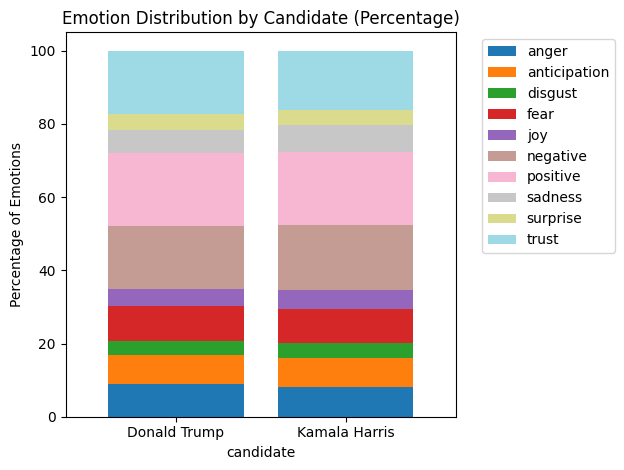

In [27]:
emotion_counts = df_emotions.groupby("candidate")[
    [
        "anger",
        "anticipation",
        "disgust",
        "fear",
        "joy",
        "negative",
        "positive",
        "sadness",
        "surprise",
        "trust",
    ]
].sum()

# Emotion counts to represent percentages
emotion_percentages = emotion_counts.div(emotion_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
emotion_percentages.plot(kind="bar", stacked=True, colormap="tab20", width=0.8)
plt.title("Emotion Distribution by Candidate (Percentage)")
plt.ylabel("Percentage of Emotions")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()